# Packages utiles

Comme vu dans l'introduction JULIA possède une bibliotèque de package assez grande dont il n'est pas forcément aisé dans faire le tri...

Je vous propose ici la description et utilisation de quelques classiques

En premier lieu deux packages graphiques :
* **PyPlot**
* **Gadfly**

et deux packages plus "statistiques" : 

* **DataFrames**
* **Rdatasets**

# Graphiques

La gestion graphique ne fait pas pertie intégrante de JULIA il faut faire appel à des packages extérieurs et on plusieurs choix possible en voici quelques uns

## PyPlot

PyPlot est basé sur une bibiliothèque éprouvée MatPlotLib (en Python). Sa syntaxe est identique à celle de MATLAB 

In [1]:
Pkg.add("PyPlot")
using PyPlot # nécessite d'avoir déjà fait Pkg.add("PyPlot")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


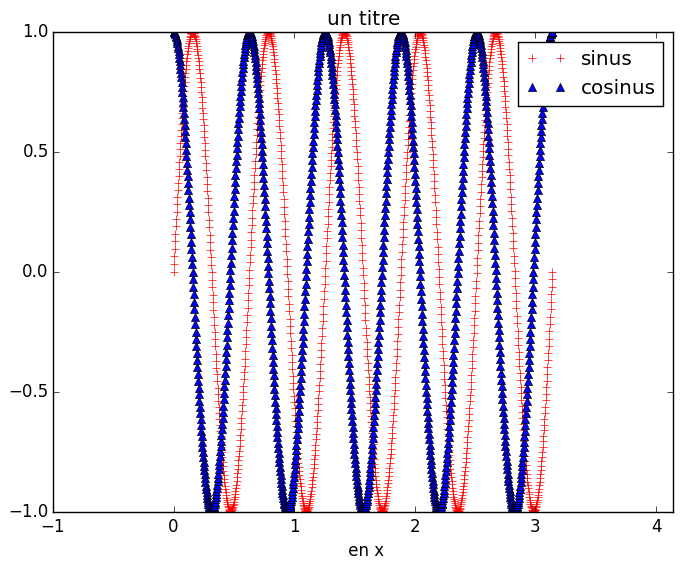

PyObject <matplotlib.legend.Legend object at 0x317d125d0>

In [2]:
x=linspace(0,pi,1000);
plot(x,sin(10*x),"r+",x,cos(10*x),"b^")
title("un titre")
xlabel(" en x ") #ylabel
xlim(-1,pi+1) #ylim
legend(["sinus","cosinus"])

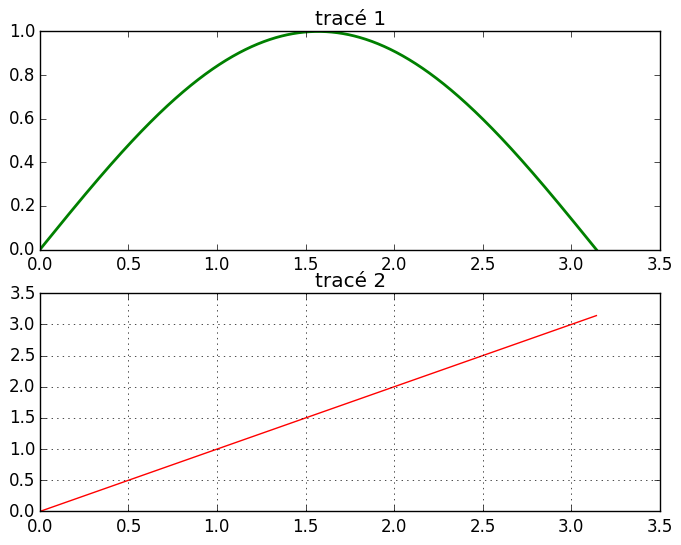

PyObject <matplotlib.text.Text object at 0x3184788d0>

In [3]:
g=figure()
subplot(2,1,1)
plot(x,sin(x),"g",linewidth=2.0)
title("tracé 1")
subplot(2,1,2)
plot(x,x,"r")
grid(true)
title("tracé 2")

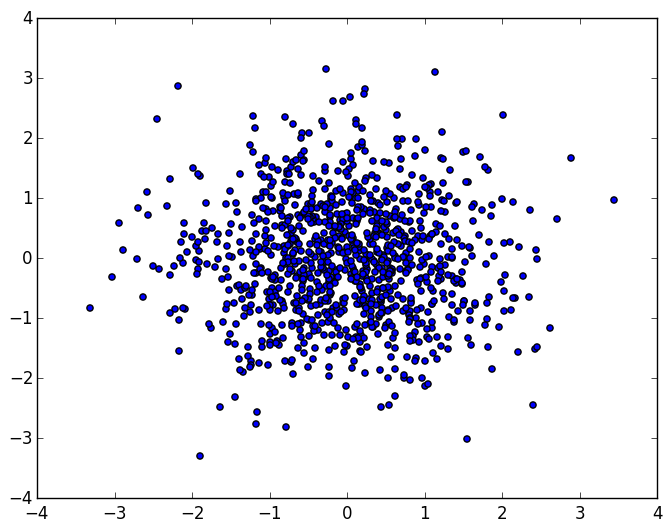

PyObject <matplotlib.collections.PathCollection object at 0x31874d5d0>

In [4]:
n=1024
X=randn(n)
Y=randn(n)
scatter(X,Y)

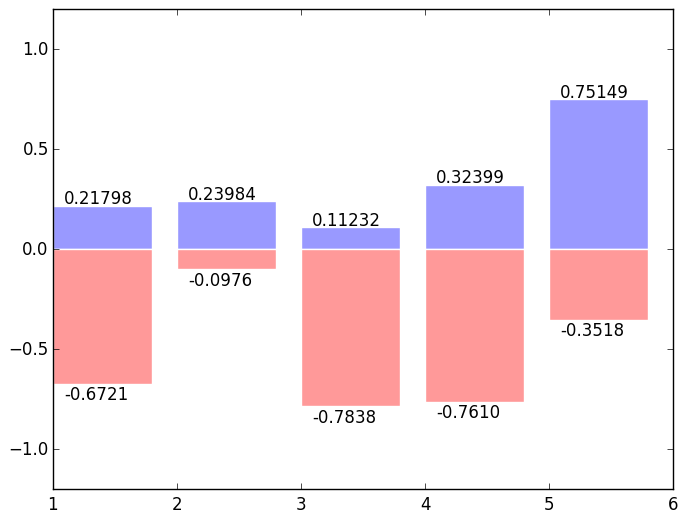

(-1.2,1.2)

In [5]:
X=rand(5)
Y=-rand(5)
bar(1:5,X,facecolor="#9999ff", edgecolor="white")
bar(1:5,Y,facecolor="#ff9999", edgecolor="white")
for i=1:5
    txt=string(X[i])
    text(i+0.1,X[i]+0.01,txt[1:7])
    txt=string(Y[i])
    text(i+0.1,Y[i]-0.08,txt[1:7])
end
ylim(-1.2,1.2)

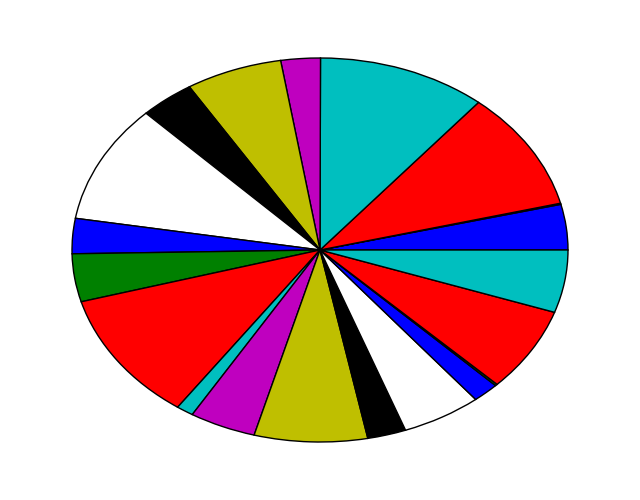

In [6]:
z=rand(20)
pie(z);

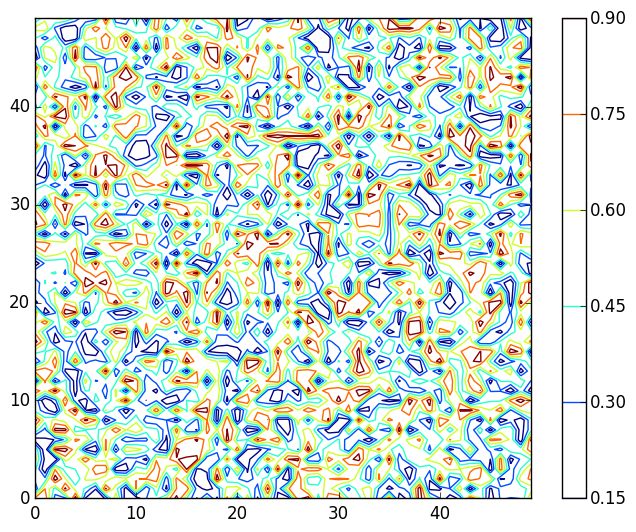

PyObject <matplotlib.colorbar.Colorbar instance at 0x318e20560>

In [7]:
contour(rand(50,50))
colorbar()

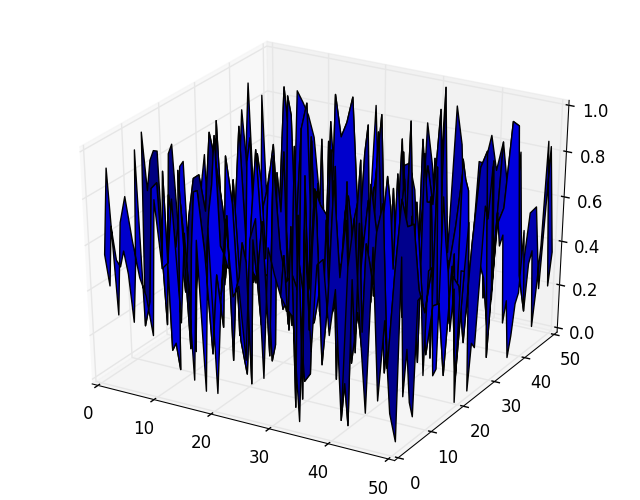

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x319103c10>

In [8]:
surf(rand(50,50))

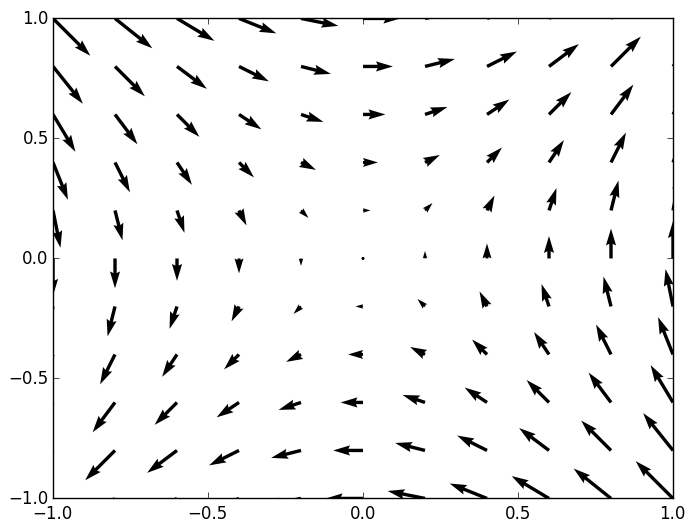

PyObject <matplotlib.quiver.Quiver object at 0x3195227d0>

In [9]:
X=[x for x=-1:0.2:1, y=-1:0.2:1]
Y=[y for x=-1:0.2:1, y=-1:0.2:1]
quiver(-1:0.2:1,-1:0.2:1,X,Y)

## Gadfly

Gadfly est basé sur la bibliothèque ggplot2 que l'on retrouve dans R.

L'utilisation de Gafly en même temps que PyPlot peut généré des conflits sur la commande plot qui devient Gadfly.plot ou alors en relançant un nouveau kernel...

In [10]:
Pkg.add("Gadfly")
using Gadfly

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Gadfly
INFO: Use `Pkg.update()` to get the latest versions of your packages


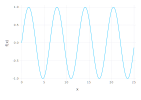

In [11]:
Gadfly.plot(sin,0,25)

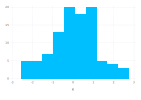

In [12]:
Gadfly.plot(x=randn(100), Geom.histogram(bincount=10))

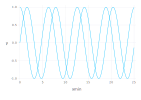

In [13]:
Gadfly.plot(layer(sin,0,25),layer(cos,0,25))

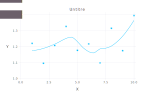

In [14]:
Gadfly.plot(x=1:10, y=2.^rand(10),
     Scale.y_sqrt, Geom.point, Geom.smooth,
Guide.xlabel("X"), Guide.ylabel("Y"), Guide.title("Un titre"))

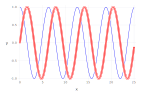

In [34]:
Gadfly.plot(
                  layer(x=collect(1:2500)/100,y=sin(collect(1:2500)/100),
                  Geom.line,Geom.point,
                  Theme(default_color=color("red"))),

                  layer(x=collect(1:2500)/100,y=cos(collect(1:2500)/100),
                  Geom.line,
                  Theme(default_color=color("blue")))
    )

D'autres packages sont disponible Winston, AsciiPlot, GLVisualize...

# DataFrames

Ce package permet de faire de la programmation en statistique.

Il introduit en autres :

* Les valeurs manquantes NA
* Le type DataArray (des Array qui peuvent contenir des NA)
* Le type DataFrame

## Type DataArray

In [16]:
Pkg.add("DataFrames")
using DataFrames

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of DataFrames
INFO: Use `Pkg.update()` to get the latest versions of your packages


Création d'un DataArray incluant un NA (Not Applicable), 

In [17]:
myda = @data([NA, 1, 2, 3, 4])

5-element DataArrays.DataArray{Int64,1}:
  NA
 1  
 2  
 3  
 4  

Pour pouvoir calculer une moyenne il faut régler le problèmes des NA en les enlevant :

In [18]:
dropna(myda) # on enlève les valeurs NA
mean(dropna(myda)) # on fait la moyenne

2.5

ou en les remplaçant par une valeur (ici on choisit une valeur arbitrairement mais il existe des règles de statistiques quant au choix du remplacement du NA) :

In [19]:
myda = @data([NA, 1, 2, 3, 4])
mean(convert(Array,myda, 0))

2.0

Les DataArray peuvent être vus comme des objets à N dimensions surlesquels on peut appliquer les mêmes opérations de base que sur les Array (package Base de JULIA) comme par exemple :

In [20]:
mydamult = @data([NA 0.0; 0.0 1.0])
mydamult * mydamult

2x2 DataArrays.DataArray{Float64,2}:
 NA   NA
 NA  1.0

## Type DataFrames

But : travailler avec des tables de données.
Ce sont des tables dont les colonnes sont des DataArray. Voici deux façons de construire des DataFrames :

In [21]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])

,A,B
1,1,M
2,2,F
3,3,F
4,4,M


In [22]:
df = DataFrame()
df[:A] = 1:8;
df[:B] = ["M", "F", "F", "M", "F", "M", "M", "F"];
df

,A,B
1,1,M
2,2,F
3,3,F
4,4,M
5,5,F
6,6,M
7,7,M
8,8,F


In [23]:
nrows = size(df, 1) # nombre de ligne
ncols = size(df, 2) # nombre de colonne

2

In [24]:
head(df)#Voir le début du tableau

,A,B
1,1,M
2,2,F
3,3,F
4,4,M
5,5,F
6,6,M


In [25]:
tail(df) #Voir la fin du tableau

,A,B
1,3,F
2,4,M
3,5,F
4,6,M
5,7,M
6,8,F


In [26]:
df[1:3, :] #Voir les lignes 1,2,3 du tableau

,A,B
1,1,M
2,2,F
3,3,F


Nous avons l'analogie avec summarize du logiciel R :

In [27]:
describe(df)

A
Min      1.0
1st Qu.  2.75
Median   4.5
Mean     4.5
3rd Qu.  6.25
Max      8.0
NAs      0
NA%      0.0%

B
Length  8
Type    ASCIIString
NAs     0
NA%     0.0%
Unique  2



In [28]:
mean(df[:A])#Moyenne sur la colonne intitulée A (première colonne)

4.5

In [29]:
median(df[:A])

4.5

In [30]:
mean(df[1]) #Moyenne sur la première colonne

4.5

Pour aller plus loin dans le travail statistique sur les Dataframes il nous faut le package RDatasets qui va fournir nombres exemples et on va y retrouver beaucoup de fonctionnalités communes au logiciel R.

## RDatasets

In [31]:
Pkg.add("RDatasets")
using RDatasets, Gadfly

INFO: Updating cache of RDatasets...
INFO: Installing RDatasets v0.1.3
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of RDatasets
INFO: Use `Pkg.update()` to get the latest versions of your packages


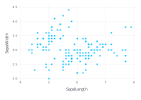

In [35]:
Gadfly.plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth", Geom.point)

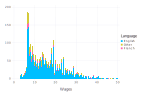

In [36]:
Gadfly.plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)

In [37]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of ColorTypes...
INFO: Updating cache of ZMQ...
INFO: Updating cache of FixedSizeArrays...
INFO: Updating cache of StatsBase...
INFO: Updating cache of IJulia...
INFO: Updating cache of URIParser...
INFO: Updating cache of DataFrames...
INFO: Updating cache of Distributions...
INFO: Updating cache of FactCheck...
INFO: Updating cache of Quaternions...
INFO: Updating cache of DataArrays...
INFO: Updating cache of Conda...
INFO: Updating cache of HttpCommon...
INFO: Updating cache of FileIO...
INFO: Updating cache of Compat...
INFO: Updating cache of JuliaParser...
INFO: Updating cache of JSON...
INFO: Updating cache of PyPlot...
INFO: Updating cache of Homebrew...
INFO: Updating cache of GZip...
INFO: Updating cache of StatsFuns...
INFO: Updating cache of Colors...
INFO: Updating cache of Optim...
INFO: Updating cache of PyCall...
INFO: Updating cache of Calculus...
INFO: Updating cache of PDMats...
INFO: Updating GLAbstraction...
INFO: Up

HEAD is now at fc85a6f test-bot: handle no-tap upload case.
HEAD is now at fc85a6f test-bot: handle no-tap upload case.
Updating tap homebrew-core


From https://github.com/Homebrew/homebrew-core
   c727238..efb386e  master     -> origin/master


HEAD is now at efb386e youtube-dl: update 2016.06.26 bottle.
Updating tap homebrew-juliadeps
HEAD is now at 867f585 Manually copy over from `juliatranslated` during `sf/rewrite` times


From https://github.com/staticfloat/homebrew-juliadeps
   c377b50..867f585  master     -> origin/master


Uninstalling gmp... (17 files, 3.2M)
==> Downloading https://homebrew.bintray.com/bottles/gmp-6.1.1.yosemite.bottle.tar.gz
==> Pouring gmp-6.1.1.yosemite.bottle.tar.gz
🍺  /Users/clope/.julia/v0.4/Homebrew/deps/usr/Cellar/gmp/6.1.1: 17 files, 3.2M


Uninstalling libpng... (25 files, 1.2M)
==> Downloading https://homebrew.bintray.com/bottles/libpng-1.6.23.yosemite.bottle.tar.gz
==> Pouring libpng-1.6.23.yosemite.bottle.tar.gz
🍺  /Users/clope/.julia/v0.4/Homebrew/deps/usr/Cellar/libpng/1.6.23: 25 files, 1.2M


INFO: Building Nettle
INFO: Building ZMQ
INFO: Building IJulia
INFO: Recompiling stale cache file /Users/clope/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Installing Jupyter via the Conda package.


Fetching package metadata: ....
Solving package specifications: .........

Package plan for installation in environment /Users/clope/.julia/v0.4/Conda/deps/usr:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-env-2.5.1            |           py27_0          26 KB
    ruamel_yaml-0.11.7         |           py27_0         174 KB
    conda-4.1.3                |           py27_0         197 KB
    jupyter-1.0.0              |           py27_3           3 KB
    ------------------------------------------------------------
                                           Total:         400 KB

The following NEW packages will be INSTALLED:

    ruamel_yaml: 0.11.7-py27_0

The following packages will be UPDATED:

    conda:       4.0.6-py27_0 --> 4.1.3-py27_0 
    conda-env:   2.4.5-py27_0 --> 2.5.1-py27_0 
    jupyter:     1.0.0-py27_2 --> 1.0.0-py27_3 

Fetching packages ...
conda-env-2.5. 1

INFO: Found Jupyter version 4.1.0: /Users/clope/.julia/v0.4/Conda/deps/usr/bin/jupyter
Writing IJulia kernelspec to /Users/clope/.julia/v0.4/IJulia/deps/julia-0.4/kernel.json ...
Installing julia kernelspec julia-0.4
[InstallKernelSpec] Removing existing kernelspec in /Users/clope/Library/Jupyter/kernels/julia-0.4
[InstallKernelSpec] Installed kernelspec julia-0.4 in /Users/clope/Library/Jupyter/kernels/julia-0.4
INFO: Building PyCall
INFO: PyCall is using /sw/bin/python (Python 2.7.9) at /sw/bin/python, libpython = /sw/lib/libpython2.7.dylib
